<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#bc23ad;overflow:hidden;font-weight:800">Hotel Reviews</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reviews/hotel_reviews.csv


## <b><div style='padding:15px;background-color:#bc23ad;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**The "Hotel Review Insights" dataset is a rich compilation of hotel reviews from various locations around the world. This dataset includes the following columns:**

Index: A unique identifier for each review entry.

Name: The name of the hotel that was reviewed.

Area: The geographic area or city where the hotel is located.

Review Date: The date when the review was posted.

Rating Attribute: The aspect or attribute of the hotel being rated.

Rating (Out of 10): A numerical rating given by the reviewer for the specific attribute.

Review Text: The text of the review written by the guest.

This dataset provides valuable insights into guests' experiences and sentiments towards different aspects of hotels, helping researchers and analysts understand trends, preferences, and areas of improvement in the hospitality industry.

**Data Science and Machine Learning Applications:**

Sentiment Analysis: With the textual reviews and associated ratings, this dataset can be used to perform sentiment analysis, determining whether the reviews are positive, negative, or neutral. This can help hotels gauge customer satisfaction and identify areas for enhancement.

In just a few lines, the dataset empowers data scientists and machine learning practitioners to explore guest sentiments, study patterns, and build predictive models that contribute to enhancing guest experiences and the hospitality industry's overall quality.

## <b><div style='padding:15px;background-color:#bc23ad;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
pd.set_option('display.max_columns',None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <b><div style='padding:15px;background-color:#bc23ad;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [3]:
df = pd.read_csv("/kaggle/input/hotel-reviews/hotel_reviews.csv")

## <b><div style='padding:15px;background-color:#bc23ad;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [4]:
# Check Dataset
print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [5]:
# Delete column "Index".

df.drop(["Index"], axis=1, inplace=True)

In [6]:
# Check Dataframe information
print('### Dataframe information ###','\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7001 non-null   object 
 1   Area               7001 non-null   object 
 2   Review_Date        7001 non-null   object 
 3   Rating_attribute   7001 non-null   object 
 4   Rating(Out of 10)  7001 non-null   float64
 5   Review_Text        6996 non-null   object 
dtypes: float64(1), object(5)
memory usage: 328.3+ KB


In [7]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 2315


<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#b9073f;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> There are 2315 duplicate data in the dataset. Let's delete them
</div>

In [8]:
# Delete duplicate data

df.drop_duplicates(inplace = True)

In [9]:
# Check row and column numbers

rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 4686
Columns: 6


In [10]:
# Null Data
print('### Null Data ###','\n')
df.isna().sum()

### Null Data ### 



Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          4
dtype: int64

In [11]:
# Numerical features
print('### Numerical features ###','\n')
df.describe(exclude=['O'])
### Numerical features ### 

### Numerical features ### 



,Rating(Out of 10)
count,4686.000000
mean,6.957618
std,2.908921
min,1.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,10.000000


In [12]:
# Categorical features
print('### Categorical features ###','\n')
df.describe(include=['O'])

### Categorical features ### 



,Name,Area,Review_Date,Rating_attribute,Review_Text
count,4686,4686,4686,4686,4682
unique,570,31,36,1875,3903
top,Maidens Hotel New Delhi,"South Delhi, New Delhi",Aug-23,Exceptional,no comments available for this review
freq,11,882,1019,511,411


In [13]:
# Number of unique values per column.

df.nunique()

Name                  570
Area                   31
Review_Date            36
Rating_attribute     1875
Rating(Out of 10)      12
Review_Text          3903
dtype: int64

In [14]:
# Rating(Out of 10) - Maximum and Minimum value

print("Maximum: " + str(df['Rating(Out of 10)'].max()))
print("Minimum: " + str(df['Rating(Out of 10)'].min()))

Maximum: 10.0
Minimum: 1.0


In [15]:
# Check the unique values and frequency for 'Rating(Out of 10)'

df['Rating(Out of 10)'].value_counts()

10.0    937
8.0     909
9.0     768
7.0     642
1.0     600
6.0     328
5.0     232
4.0      95
3.0      91
2.0      82
2.5       1
7.9       1
Name: Rating(Out of 10), dtype: int64

In [16]:
df['Rating(Out of 10)'].unique()

array([ 9. ,  8. , 10. ,  7. ,  6. ,  1. ,  4. ,  5. ,  2. ,  3. ,  2.5,
        7.9])

## <b><div style='padding:15px;background-color:#bc23ad;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

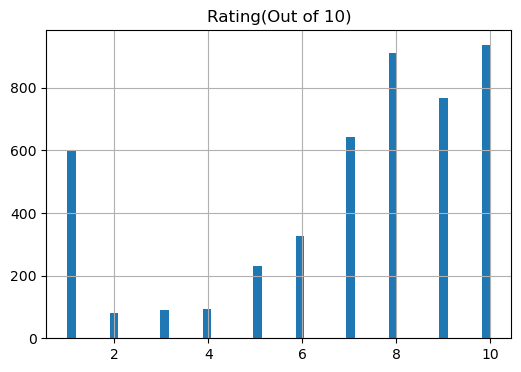

In [17]:
# Histogram

df.hist(bins=50, figsize=(6,4))
plt.show()

In [18]:
# Function to graph - Rating(Out of 10)

def bar_chart(columnName):
    char_bar = df.groupby([columnName])[['Name','Rating(Out of 10)']].mean().reset_index()
    char_bar = char_bar.sort_values(by=("Rating(Out of 10)"), ascending=False)

    top = char_bar.head(10)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top[columnName], y=top["Rating(Out of 10)"]))

    fig.update_layout(title="Top " + columnName + " by Rating(Out of 10)",
                  xaxis_title=columnName,
                  yaxis_title= "Rating(Out of 10)",
                  plot_bgcolor='black', 
                  paper_bgcolor='gray',  
                  font=dict(color='white'))

    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

In [19]:
bar_chart('Name')

In [20]:
bar_chart('Area')


In [21]:
bar_chart('Rating_attribute')


## <b><div style='padding:15px;background-color:#bc23ad;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  Preprocessing - Sentiment</div></b>

In [22]:
# Create a copy of the dataset with only columns Review_Text and Rating(Out of 10) 
df=df[['Review_Text','Rating(Out of 10)']].copy()

# Rename columns
df = df.rename(columns={'Review_Text': 'text', 'Rating(Out of 10)': 'label'})
df

,text,label
0,Hotel the pearl is perfect place to stay in De...,9.0
1,Location of the hotel is perfect. The hotel is...,9.0
2,"Location, Indian food.",9.0
3,The location and the hotel itself is great. Ne...,9.0
4,Friendly and smiling staffs.. The reception st...,9.0
...,...,...
6987,Good response.couteous staff. Staff are taking...,8.0
6988,"Location is very good, walking distance from m...",8.0
6989,Nice staff .. really good and helpful people,8.0
6990,We booked a Deluxe room but since we wanted th...,7.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686 entries, 0 to 6991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    4682 non-null   object 
 1   label   4686 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.8+ KB


In [24]:
# Delete null data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 6991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    4682 non-null   object 
 1   label   4682 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.7+ KB


In [25]:
df.label.value_counts()

10.0    937
8.0     909
9.0     768
7.0     640
1.0     600
6.0     327
5.0     232
4.0      95
3.0      91
2.0      81
2.5       1
7.9       1
Name: label, dtype: int64

In [26]:
# This function returns sentiment value based on:
# label <= 3.0 -> Negative
# label in between 3.0 and 7.0 -> Neutral
# label > 7.0 -> Positive


def conv(row):
    
    if row['label'] <= 3.0:
        val = 'Negative'
    elif row['label'] >= 7.0:
        val = 'Positive'
    else: 
        val = 'Neutral'
    
    return val

In [27]:
# Applying the function in our dataset
df['label'] = df.apply(conv, axis=1)
df.head()

,text,label
0,Hotel the pearl is perfect place to stay in De...,Positive
1,Location of the hotel is perfect. The hotel is...,Positive
2,"Location, Indian food.",Positive
3,The location and the hotel itself is great. Ne...,Positive
4,Friendly and smiling staffs.. The reception st...,Positive


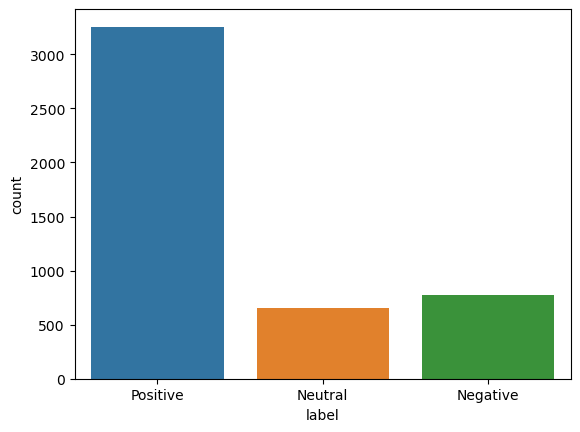

In [28]:
sns.countplot(x ='label', data = df)
 
plt.show()

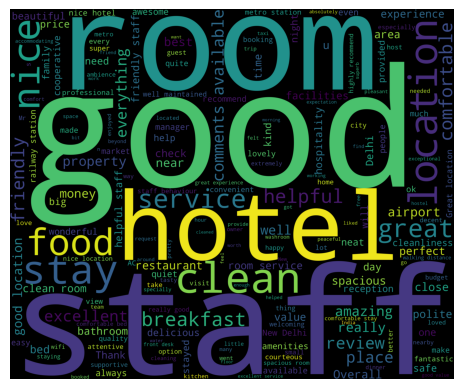

In [29]:
# WordCloud - Sentiment Positive

df1 = df[df['label']== 'Positive']
words = ' '.join(df1['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

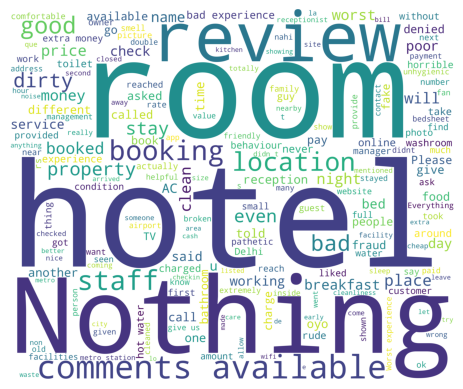

In [30]:
# WordCloud - Sentiment Negative

df2 = df[df['label']=='Negative']
words = ' '.join(df2['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Cleaning label column**

In [31]:
def tweet_to_words(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)

In [32]:
def tweet_len(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

In [33]:
df['labels'] = df['label'].apply(lambda x:0 if x=='negative' else 1)
df['clean_tweet'] = df['text'].astype(str).apply(lambda x:tweet_to_words(x))
df['tweet_length'] = df['text'].astype(str).apply(lambda x:tweet_len(x))
train_data, test_data = train_test_split(df,test_size=0.2,random_state=123)

In [34]:
train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features = v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

## <b><div style='padding:15px;background-color:#bc23ad;color:white;border-radius:40px;font-size:110%;text-align: center'>7  |  Model Built</div></b>

In [36]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(verbose=False),
    SGDClassifier()]

In [37]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train_data['label'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_data['label'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test_data['label'])*100
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is: '+str(accuracy) + '%')

Accuracy of LogisticRegression is: 70.11739594450374%
Accuracy of KNeighborsClassifier is: 64.46104589114195%
Accuracy of DecisionTreeClassifier is: 67.982924226254%
Accuracy of RandomForestClassifier is: 74.3863393810032%
Accuracy of AdaBoostClassifier is: 76.41408751334045%
Accuracy of GaussianNB is: 50.58697972251868%
Accuracy of CatBoostClassifier is: 76.8409818569904%
Accuracy of SGDClassifier is: 76.09391675560299%


In [38]:
result = pd.DataFrame({'Models':Model})
result['Accuracy'] = Accuracy
result = result.sort_values(by='Accuracy',ascending=False)
result

,Models,Accuracy
6,CatBoostClassifier,76.840982
4,AdaBoostClassifier,76.414088
7,SGDClassifier,76.093917
3,RandomForestClassifier,74.386339
0,LogisticRegression,70.117396
2,DecisionTreeClassifier,67.982924
1,KNeighborsClassifier,64.461046
5,GaussianNB,50.586980


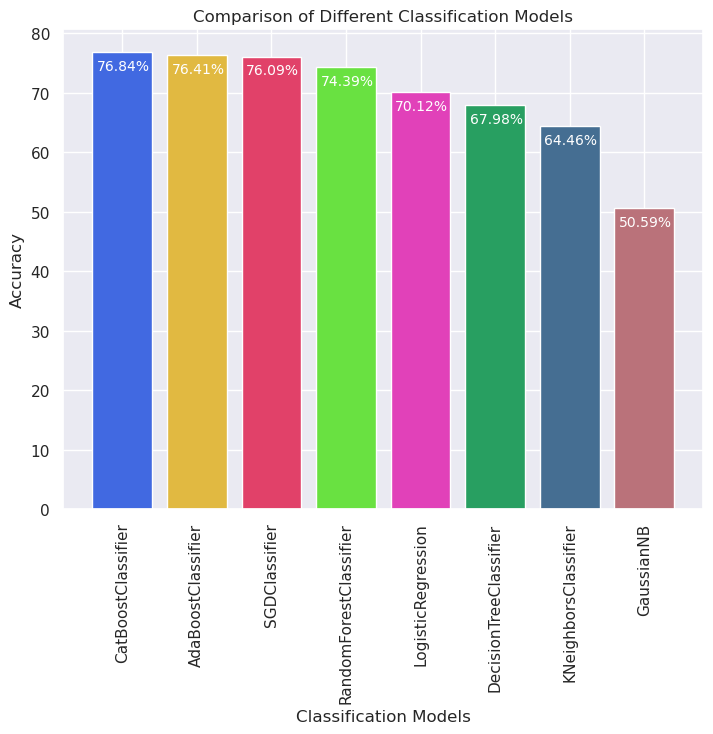

In [39]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['CatBoostClassifier', 'AdaBoostClassifier', 'SGDClassifier', 'RandomForestClassifier',
          'LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB']
Accuracy= result['Accuracy']
ax.bar(Models,Accuracy,color=['#4169e1', '#e1b941', '#e14169', '#69e141','#e141b9','#289f61','#456e92', '#ba727a']);
for i in ax.patches:
    ax.text(i.get_x()+.06, i.get_height()-3.0, str(round(i.get_height(),2))+ '%', fontsize=10, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models')
plt.xticks(rotation=90);

## <b><div style='padding:15px;background-color:#bc23ad;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you.</div></b>